In [22]:
import glob
import shutil
import cv2
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
import PIL

In [23]:
base_dir = os.path.join('D:\\majorProject\\Sahil')

train_dir = os.path.join(base_dir, 'train')
train_img_dir = os.path.join(train_dir, 'images')
train_label_dir = os.path.join(train_dir, 'labels')

test_dir = os.path.join(base_dir, 'test')
test_img_dir = os.path.join(test_dir, 'images')
test_label_dir = os.path.join(test_dir, 'labels')

In [25]:
print(base_dir)
print(train_dir)
print(train_img_dir)
print(train_label_dir)
print(test_dir)

D:\majorProject\Sahil
D:\majorProject\Sahil\train
D:\majorProject\Sahil\train\images
D:\majorProject\Sahil\train\labels
D:\majorProject\Sahil\test


In [26]:
def create_dir(path):
    if not os.path.exists(path):
        os.mkdir(path)

In [27]:
create_dir(base_dir)

create_dir(train_dir)
create_dir(train_img_dir)
create_dir(train_label_dir)

create_dir(test_dir)
create_dir(test_img_dir)
create_dir(test_label_dir)

In [28]:
dataset_path = 'D:\\majorProject\\Sahil\\dataset'

In [29]:
fruit_count=[]
fruit_name=[]
for i in os.listdir(dataset_path+'/train'):
    fruit_name.append(i)
    fruit_count.append(len(os.listdir(os.path.join(dataset_path+'/train', i))))

In [30]:
fruit_df = pd.DataFrame({'fruit_name':fruit_name, 'fruit_count':fruit_count})

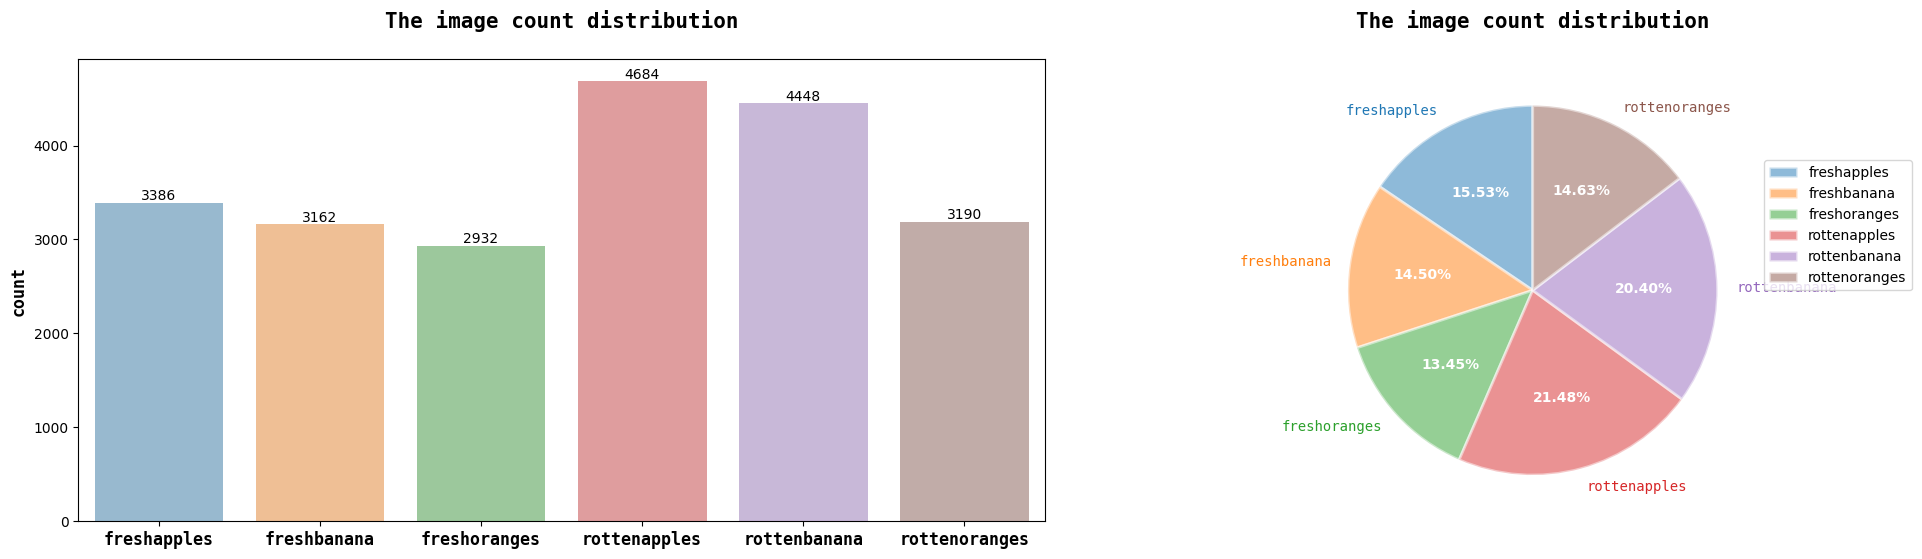

In [31]:
fig,axes = plt.subplots(1,2,figsize=(25,6), gridspec_kw=dict(wspace=0.005))
sns.barplot(data=fruit_df, x='fruit_name', y='fruit_count',ax=axes[0], alpha=0.5)
for i in axes[0].get_xticklabels():
    i.set_font('monospace')
    i.set_weight('semibold')
    i.set_size(12)
for j in axes[0].containers:
    axes[0].bar_label(j)
    
axes[0].set_xlabel('')
axes[0].set_ylabel('count', font='monospace', weight='semibold', size=12)
axes[0].set_title('The image count distribution\n', font='monospace', weight='semibold', size=15)

patches, texts, pcts = axes[1].pie(fruit_df['fruit_count'], labels=fruit_df['fruit_name'], wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
            textprops={'size': 'x-large'}, startangle=90, autopct='%1.2f%%');
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
    patch.set_alpha(0.5)
for j in pcts:
    j.set_size(10)
    j.set_color('white')
    j.set_weight('semibold')
plt.setp(texts, fontweight='semibold', font='monospace')
axes[1].legend(loc=[1,0.5])
axes[1].set_title('The image count distribution\n', font='monospace', weight='semibold', size=15);

In [32]:
def get_image_range(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower = np.array([0, 0, 0], dtype = "uint8")
    upper = np.array([255, 50, 255], dtype = "uint8")
    img = cv2.inRange(img, lower, upper)
    img = cv2.blur(img, (2, 2))
    ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY)
    img = cv2.bitwise_not(thresh)
    contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = max(contours, key=lambda x: cv2.contourArea(x))
    
    #get bounding box posotion
    xmin, ymin, xmax, ymax = cv2.boundingRect(contours)
    
    #get the original width,height of the image
    dimensions = img.shape
    h = img.shape[0]
    w = img.shape[1]
    
    #to calculate the bndBox info of this image for yolo
    xp = (xmin + (xmax-xmin)/2) * 1.0 / w
    yp = (ymin + (ymax-ymin)/2) * 1.0 / h
    wp = (xmax-xmin) * 1.0 / w
    hp = (ymax-ymin) * 1.0 / h
    return xp, yp, wp, hp

In [33]:
for dirname, _, filenames in os.walk(dataset_path):
    split_dirname = dirname[1:].split('\\')
    print(split_dirname)
    if len(split_dirname) >= 2:
        print(len(split_dirname))
        if split_dirname[-2] == 'train':
            for img_path in glob.glob(dirname+'/*.png'):
                shutil.copy(img_path, os.path.join(train_img_dir, img_path.split('\\')[-1]))
                label=0
                if img_path.split('\\')[-2] == 'freshapples':
                  label=0
                elif img_path.split('\\')[-2] == 'freshbanana':
                  label=1
                elif img_path.split('\\')[-2] == 'freshoranges':
                  label=2
                elif img_path.split('\\')[-2] == 'rottenapples':
                  label=3
                elif img_path.split('\\')[-2] == 'rottenbanana':
                  label=4
                elif img_path.split('\\')[-2] == 'rottenoranges':
                  label=5
                x_center, y_center, box_width, box_height = get_image_range(img_path)
                text = str(label)+' '+str(x_center)+' '+str(y_center)+' '+str(box_width)+' '+str(box_height)
                with open (os.path.join(train_label_dir, img_path.split('\\')[-1][:-4]+'.txt'),'w') as file:
                 file.write(text)
        elif split_dirname[-2] == 'test':
            for img_path in glob.glob(dirname+'/*.png'):
                shutil.copy(img_path, os.path.join(test_img_dir, img_path.split('\\')[-1]))
                label=0
                if img_path.split('\\')[-2] == 'freshapples':
                 label=0
                elif img_path.split('\\')[-2] == 'freshbanana':
                 label=1
                elif img_path.split('\\')[-2] == 'freshoranges':
                  label=2
                elif img_path.split('\\')[-2] == 'rottenapples':
                 label=3
                elif img_path.split('\\')[-2] == 'rottenbanana':
                 label=4
                elif img_path.split('\\')[-2] == 'rottenoranges':
                 label=5
                x_center, y_center, box_width, box_height = get_image_range(img_path)
                text = str(label)+' '+str(x_center)+' '+str(y_center)+' '+str(box_width)+' '+str(box_height)
                with open (os.path.join(test_label_dir, img_path.split('\\')[-1][:-4]+'.txt'),'w') as file:
                    file.write(text)
        
        

[':', 'majorProject', 'Sahil', 'dataset']
4
[':', 'majorProject', 'Sahil', 'dataset', 'test']
5
[':', 'majorProject', 'Sahil', 'dataset', 'test', 'freshapples']
6
[':', 'majorProject', 'Sahil', 'dataset', 'test', 'freshbanana']
6
[':', 'majorProject', 'Sahil', 'dataset', 'test', 'freshoranges']
6
[':', 'majorProject', 'Sahil', 'dataset', 'test', 'rottenapples']
6
[':', 'majorProject', 'Sahil', 'dataset', 'test', 'rottenbanana']
6
[':', 'majorProject', 'Sahil', 'dataset', 'test', 'rottenoranges']
6
[':', 'majorProject', 'Sahil', 'dataset', 'train']
5
[':', 'majorProject', 'Sahil', 'dataset', 'train', 'freshapples']
6
[':', 'majorProject', 'Sahil', 'dataset', 'train', 'freshbanana']
6
[':', 'majorProject', 'Sahil', 'dataset', 'train', 'freshoranges']
6
[':', 'majorProject', 'Sahil', 'dataset', 'train', 'rottenapples']
6
[':', 'majorProject', 'Sahil', 'dataset', 'train', 'rottenbanana']
6
[':', 'majorProject', 'Sahil', 'dataset', 'train', 'rottenoranges']
6


In [35]:
print(f'There are {len(os.listdir(train_img_dir))} train images')
print(f'There are {len(os.listdir(train_label_dir))} corresponding train labels\n')

print(f'There are {len(os.listdir(test_img_dir))} test images')
print(f'There are {len(os.listdir(test_label_dir))} corresponding test labels')

There are 10901 train images
There are 10901 corresponding train labels

There are 2698 test images
There are 2698 corresponding test labels


In [36]:
df = pd.DataFrame({'file':['train', 'test'], 'count':[len(os.listdir(train_img_dir)),len(os.listdir(test_img_dir))]})

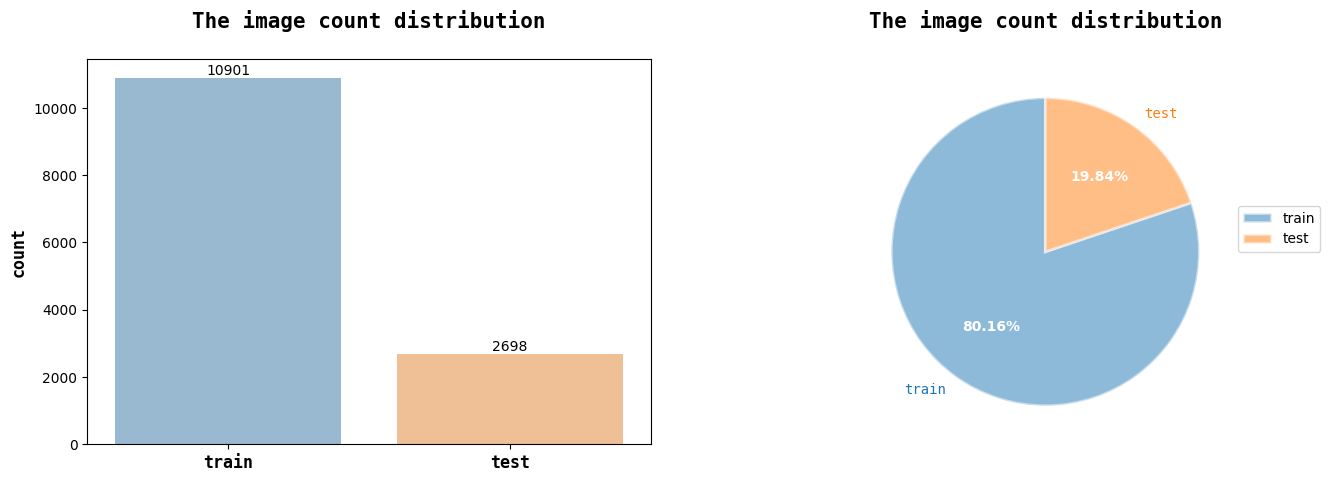

In [37]:
fig,axes = plt.subplots(1,2,figsize=(16,5))
sns.barplot(data=df.reset_index(), x='file', y='count',ax=axes[0], alpha=0.5)
for i in axes[0].get_xticklabels():
    i.set_font('monospace')
    i.set_weight('semibold')
    i.set_size(12)
for j in axes[0].containers:
    axes[0].bar_label(j)
    
axes[0].set_xlabel('')
axes[0].set_ylabel('count', font='monospace', weight='semibold', size=12)
axes[0].set_title('The image count distribution\n', font='monospace', weight='semibold', size=15)

patches, texts, pcts = axes[1].pie(df['count'], labels=df['file'], wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
            textprops={'size': 'x-large'}, startangle=90, autopct='%1.2f%%');
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
    patch.set_alpha(0.5)
for j in pcts:
    j.set_size(10)
    j.set_color('white')
    j.set_weight('semibold')
plt.setp(texts, fontweight='semibold', font='monospace')
axes[1].legend(loc=[1,0.5])
axes[1].set_title('The image count distribution\n', font='monospace', weight='semibold', size=15);

In [38]:
for path in os.listdir(train_img_dir):
    if 'translation' in path:
        os.remove(os.path.join(train_img_dir, path))
    elif 'rotated' in path:
        os.remove(os.path.join(train_img_dir, path))
    elif 'vertical_flip' in path:
        os.remove(os.path.join(train_img_dir, path))
    elif 'saltandpepper' in path:
        os.remove(os.path.join(train_img_dir, path))

In [39]:
print(f'There are {len(os.listdir(train_img_dir))} train images')
print(f'There are {len(os.listdir(train_label_dir))} corresponding train labels\n')

print(f'There are {len(os.listdir(test_img_dir))} test images')
print(f'There are {len(os.listdir(test_label_dir))} corresponding test labels')

There are 1182 train images
There are 10901 corresponding train labels

There are 2698 test images
There are 2698 corresponding test labels


In [40]:
for path in os.listdir(test_img_dir):
    if 'translation' in path:
        os.remove(os.path.join(test_img_dir, path))
    elif 'rotated' in path:
        os.remove(os.path.join(test_img_dir, path))
    elif 'vertical_flip' in path:
        os.remove(os.path.join(test_img_dir, path))
    elif 'saltandpepper' in path:
        os.remove(os.path.join(test_img_dir, path))

In [41]:
for path in os.listdir(train_label_dir):
    if 'translation' in path:
        os.remove(os.path.join(train_label_dir, path))
    elif 'rotated' in path:
        os.remove(os.path.join(train_label_dir, path))
    elif 'vertical_flip' in path:
        os.remove(os.path.join(train_label_dir, path))
    elif 'saltandpepper' in path:
        os.remove(os.path.join(train_label_dir, path))

In [42]:
for path in os.listdir(test_label_dir):
    if 'translation' in path:
        os.remove(os.path.join(test_label_dir, path))
    elif 'rotated' in path:
        os.remove(os.path.join(test_label_dir, path))
    elif 'vertical_flip' in path:
        os.remove(os.path.join(test_label_dir, path))
    elif 'saltandpepper' in path:
        os.remove(os.path.join(test_label_dir, path))

In [43]:
print(f'There are {len(os.listdir(train_img_dir))} train images')
print(f'There are {len(os.listdir(train_label_dir))} corresponding train labels\n')

print(f'There are {len(os.listdir(test_img_dir))} train images')
print(f'There are {len(os.listdir(test_label_dir))} corresponding test labels')

There are 1182 train images
There are 1182 corresponding train labels

There are 329 train images
There are 329 corresponding test labels


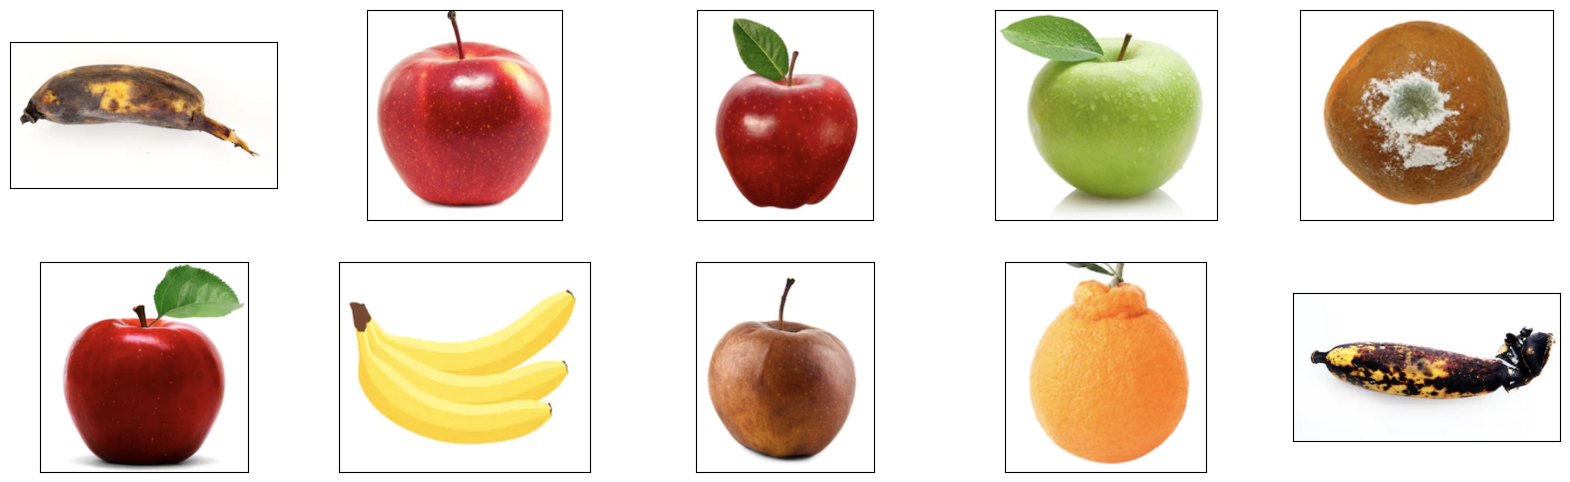

In [44]:
img_path=[]
selected_img = random.sample([i for i in os.listdir(train_img_dir)], 10)
for i in selected_img:
    img_path.append(os.path.join(train_img_dir, i))


fig, axes = plt.subplots(2,5, figsize=(20,6), subplot_kw=dict(xticks=[], yticks=[]))
for i, ax in enumerate(axes.flat):
    ax.imshow(np.array(PIL.Image.open(img_path[i])))

In [46]:
yaml_file = """names: 
- fresh_apples 
- fresh_banana
- fresh_oranges
- rotten_apples
- rotten_banana
- rotten_oranges
nc: 6
train: D:\\majorProject\\Sahil\\train\\images
val: D:\\majorProject\\Sahil\\train\\images
"""

with open('D:\\majorProject\\Sahil\\data.yaml', 'w') as f:
    f.write(yaml_file)

In [47]:
with open(os.path.join(train_label_dir, os.listdir(train_label_dir)[0]),'r') as f:
    c = f.read()
    print(c)

3 0.4592391304347826 0.4595959595959596 0.8532608695652174 0.7272727272727273


In [49]:
!pip install ultralytics

  Using cached ultralytics-8.1.45-py3-none-any.whl (749 kB)
  Using cached torchvision-0.17.2-cp311-cp311-win_amd64.whl (1.2 MB)
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\sahil\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\torchvision\\models\\quantization\\shufflenetv2.py'
Check the permissions.


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: C:\Users\sahil\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.11.0 which is incompatible.

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: C:\Users\sahil\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     -------------------------------------- 749.6/749.6 kB 2.5 MB/s eta 0:00:00
     -------------------------------------- 144.7/144.7 kB 8.4 MB/s eta 0:00:00
     -------------------------------------- 198.6/198.6 MB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 5.3 MB/s eta 0:00:00
     ---------------------------------------- 5.7/5.7 MB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 5.2 MB/s eta 0:00:00
     -------------------------------------- 172.0/172.0 kB 3.4 MB/s eta 0:00:00
     -------------------------------------- 536.2/536.2 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0


In [50]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output
! yolo checks



Ultralytics YOLOv8.1.45 🚀 Python-3.11.9 torch-2.2.2+cpu CPU (12th Gen Intel Core(TM) i5-1240P)
Setup complete ✅ (16 CPUs, 15.7 GB RAM, 52.0/97.8 GB disk)

OS                  Windows-10-10.0.22631-SP0
Environment         Windows
Python              3.11.9
Install             pip
RAM                 15.71 GB
CPU                 12th Gen Intel Core(TM) i5-1240P
CUDA                None

matplotlib          ✅ 3.7.2>=3.3.0
opencv-python       ✅ 4.8.0.74>=4.6.0
pillow              ✅ 10.0.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.1>=1.4.1
torch               ✅ 2.2.2>=1.8.0
torchvision         ✅ 0.17.2>=0.9.0
tqdm                ✅ 4.66.1>=4.64.0
psutil              ✅ 5.9.7
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1
pandas              ✅ 2.0.3>=1.1.4
seaborn             ✅ 0.12.2>=0.11.0


In [54]:
!pip install pytorch torchvision torchaudio


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 2.4/2.4 MB 3.4 MB/s eta 0:00:00
  Running setup.py clean for pytorch
Failed to build pytorch
  Running setup.py install for pytorch: started
  Running setup.py install for pytorch: finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\sahil\AppData\Local\Temp\pip-install-m26rzqe6\pytorch_ab8b8a27b3b24fcba5ee228690964b07\setup.py", line 15, in <module>
          raise Exception(message)
      Exception: You tried to install "pytorch". The package named for PyTorch is "torch"
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
  error: subprocess-exited-with-error
  
  × Running setup.py install for pytorch did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in 

In [59]:
!yolo task=detect \
mode=train \
model=yolov8s.pt \
data='D:\\majorProject\\Sahil\\data.yaml' \
epochs=10 \
imgsz=640